In [12]:
import pickle
import numpy as np
import pickle
import sys
import random

sys.path.append('../')
from riskrrt import RiskRRT
from utils import *
from biriskrrt import BiRiskRRT, BiRiskRRTPed, TrajReader
from param import BiParams
from utils import OccupancyGrid, generateSimulationVideo
import cv2
import time
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
with open('../results/imitation_dataset/all_scenes.pkl', 'rb') as f:
    scenes = pickle.load(f)

In [3]:
len(scenes)

900

In [4]:
for i in range(20):
    print(len(scenes[i]['pedestrians'][0]))

2
8
2
2
9
2
2
9
2
2
2
8
2
9
9
8
8
9
8
9


In [8]:

n_peds = []
for i in range(900):
    n_peds.append(max(max([[a[0] for a in time] for time in scenes[i]['pedestrians']])))


In [13]:
np.mean(n_peds), np.max(n_peds)

(19.102222222222224, 31)

(array([ 16.,  59.,  78., 140., 301., 190.,  18.,  11.,   3.,  84.]),
 array([ 9. , 11.2, 13.4, 15.6, 17.8, 20. , 22.2, 24.4, 26.6, 28.8, 31. ]),
 <BarContainer object of 10 artists>)

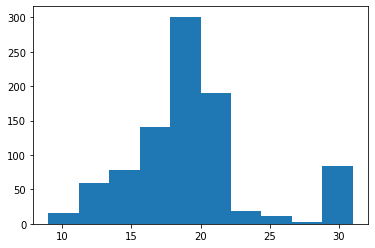

In [14]:
# number of total pedestrians
plt.hist(n_peds)

In [16]:

n_peds = []
for i in range(900):
    n_peds.append(max([len(time) for time in scenes[i]['pedestrians']]))


In [17]:
np.mean(n_peds), np.max(n_peds)

(10.372222222222222, 12)

(array([  2.,   0.,   0., 117.,   0.,   8., 326.,   0., 309., 138.]),
 array([ 6. ,  6.6,  7.2,  7.8,  8.4,  9. ,  9.6, 10.2, 10.8, 11.4, 12. ]),
 <BarContainer object of 10 artists>)

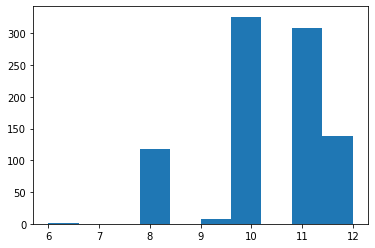

In [18]:
# number of max simultaneous pedestrians
plt.hist(n_peds)


we can use 12 agents max.

In [28]:
peds = np.array(scenes[1]['pedestrians'][1])[:,1:]
peds.shape

(8, 2)

In [29]:
np.pad(peds, ((peds.shape[0], 12-peds.shape[0]),(2,2))).shape

(20, 6)